In [217]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [218]:
#Importing data
df = pd.read_csv('train.csv')
#Printing head
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [219]:
#Printing tail
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [220]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('train.csv', nrows = 11856)
df.tail()

,ID,Datetime,Count
11851,11851,31-12-2013 19:00,286
11852,11852,31-12-2013 20:00,256
11853,11853,31-12-2013 21:00,228
11854,11854,31-12-2013 22:00,216
11855,11855,31-12-2013 23:00,246


In [221]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

In [222]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()
test.tail()

/var/folders/vp/sm5xz5q54bdbh44gpqxk_dzm0000gn/T/ipykernel_90117/2656172758.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
/var/folders/vp/sm5xz5q54bdbh44gpqxk_dzm0000gn/T/ipykernel_90117/2656172758.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
/var/folders/vp/sm5xz5q54bdbh44gpqxk_dzm0000gn/T/ipykernel_90117/2656172758.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')


,ID,Count
Datetime,,
2013-12-27,11747.5,161.166667
2013-12-28,11771.5,128.500000
2013-12-29,11795.5,97.083333
2013-12-30,11819.5,205.333333
2013-12-31,11843.5,202.500000


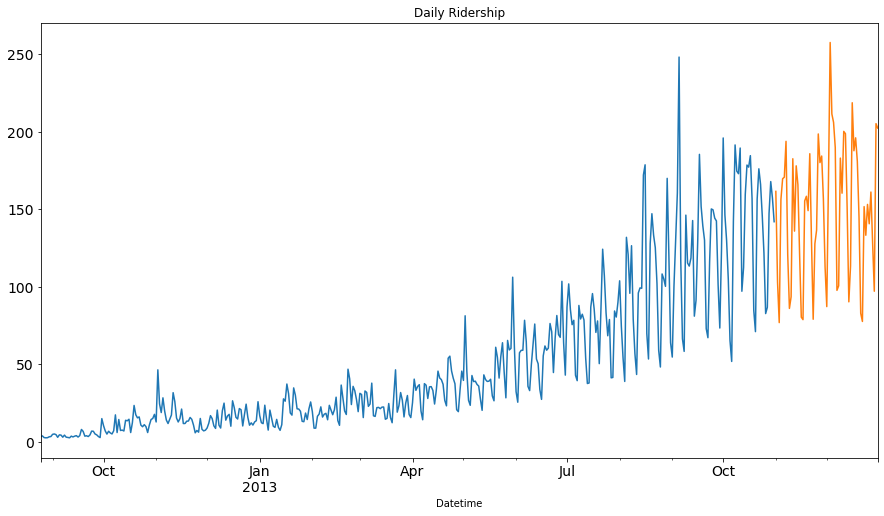

In [223]:
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

# Method 1: Naive Approach

### If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.

![Naive approach formula](./naive-approach.webp)


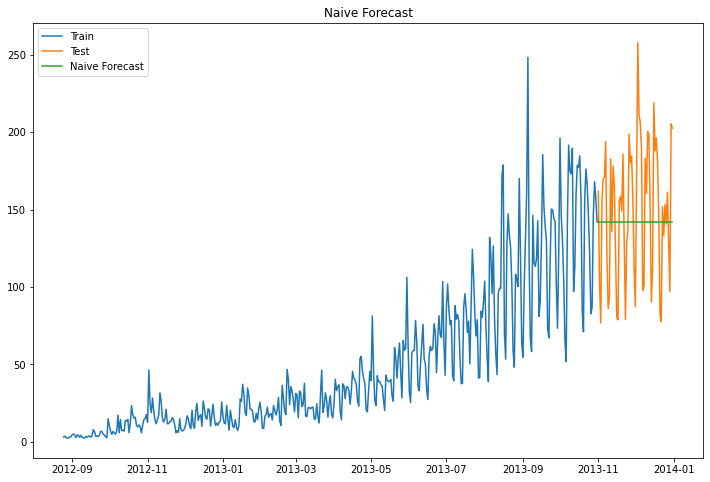

In [224]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['Count'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['Count'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [225]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

In [226]:
def calculate_metrics_and_print_results(prediction):
    mae = mean_absolute_error(test.Count, prediction.Count)
    print('Mean Absolute Error:', mae)

    mape = mean_absolute_percentage_error(test.Count, prediction.Count)
    print('Mean Absolute Percentage Error:', mape)

    mse = mean_squared_error(test.Count, prediction.Count)
    print('Mean Squared Error:', mse)

    rmse = sqrt(mean_squared_error(test.Count, prediction.Count))
    print('Root Mean Squared Error:', rmse)

In [227]:
calculate_metrics_and_print_results(y_hat)

Mean Absolute Error: 37.46448087431693
Mean Absolute Percentage Error: 0.28350408686153894
Mean Squared Error: 1928.6507285974499
Root Mean Squared Error: 43.91640614391676


# Method 2: – Simple Average

### Many a times we are provided with a dataset, which though varies by a small margin throughout it’s time period, but the average at each time period remains constant. In such a case we can forecast the price of the next day somewhere similar to the average of all the past days.

### Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.

![Simple average formula](./simple-average.png)

### We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

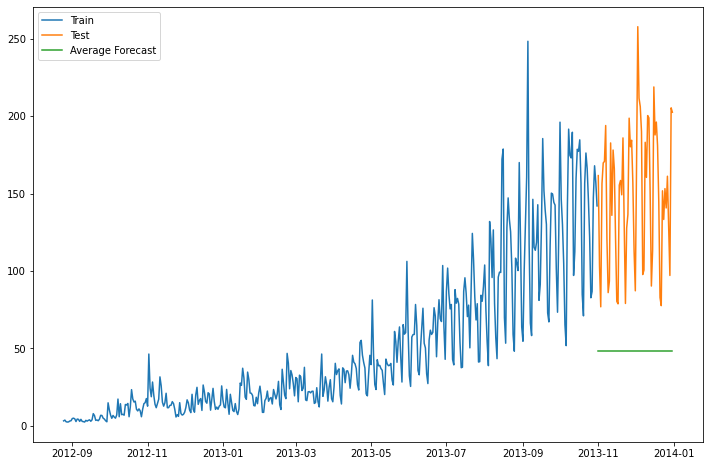

In [228]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [229]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

109.88526527082863


# Method 3 – Moving Average

### Many a times we are provided with a dataset, in which the prices/sales of the object increased/decreased sharply some time periods ago. In order to use the  previous Average method, we have to use the mean of all the previous data, but using all the previous data doesn’t sound right.

### Using the values of the initial period would highly affect the forecast for the next period. Therefore as an improvement over simple average, we will take the average of the values for last few time periods only. Obviously the thinking here is that only the recent values matter. Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

### Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p

![Moving average formula](./moving-average.webp)


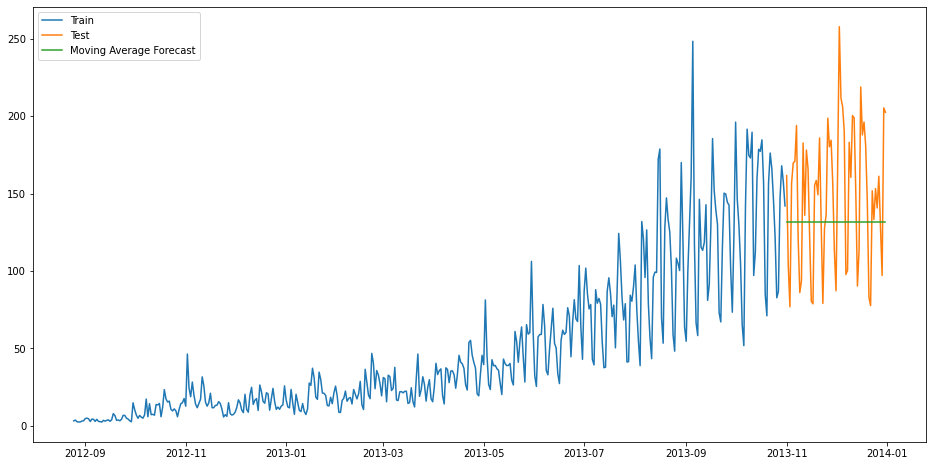

In [230]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [231]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

46.72840725106963


### An advancement over Moving average method is Weighted moving average method. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

### A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more. 

### Instead of selecting a window size, it requires a list of weights (which should add up to 1). For example if we pick [0.40, 0.25, 0.20, 0.15] as weights, we would be giving 40%, 25%, 20% and 15% to the last 4 points respectively.

![Weighted moving average formula](./weighted-moving-average.png)


# Method 4 – Simple Exponential Smoothing

### The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

![Simple exponential smoothing formula 1](./simple-exponential-smoothing-1.png)

### where 0≤ α ≤1 is the smoothing parameter.

### The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

### If you stare at it just long enough, you will see that the expected value ŷx is the sum of two products: α⋅yt and (1−α)⋅ŷ t-1.

### Hence, it can also be written as :

![Simple exponential smoothing formula 2](./simple-exponential-smoothing-2.webp)

### So essentially we’ve got a weighted moving average with two weights: α and 1−α.

### As we can see, 1−α is multiplied by the previous expected value ŷ x−1 which makes the expression recursive. And this is why this method is called Exponential. The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1.

In [232]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

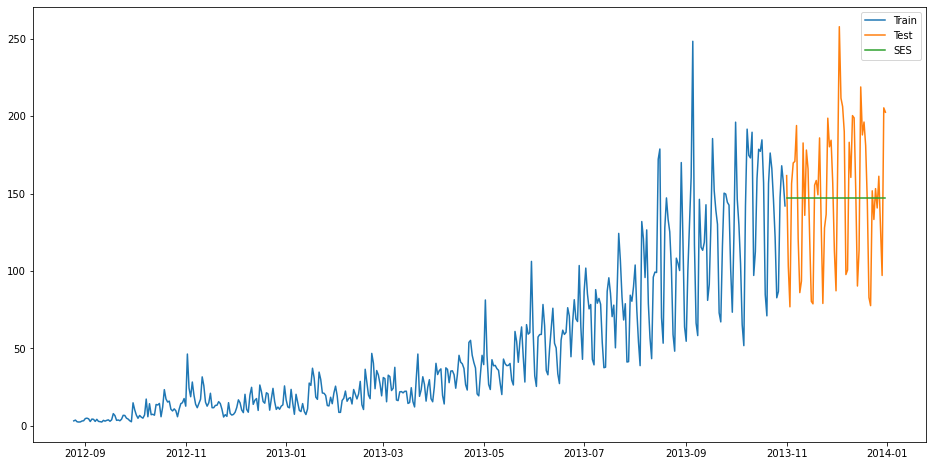

In [233]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

# Method 5 – Holt’s Linear Trend method

### Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

### Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

### The values we predicted in the above algorithms are called Level. In the above three equations, you can notice that we have added level and trend to generate the forecast equation.

![Holts linear trend method formula](./holt-linear.webp)

### As with simple exponential smoothing, the level equation here shows that it is a weighted average of observation and the within-sample one-step-ahead forecast The trend equation shows that it is a weighted average of the estimated trend at time t based on ℓ(t)−ℓ(t−1) and b(t−1), the previous estimate of the trend.

### We will add these equations to generate Forecast equation. We can also generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.

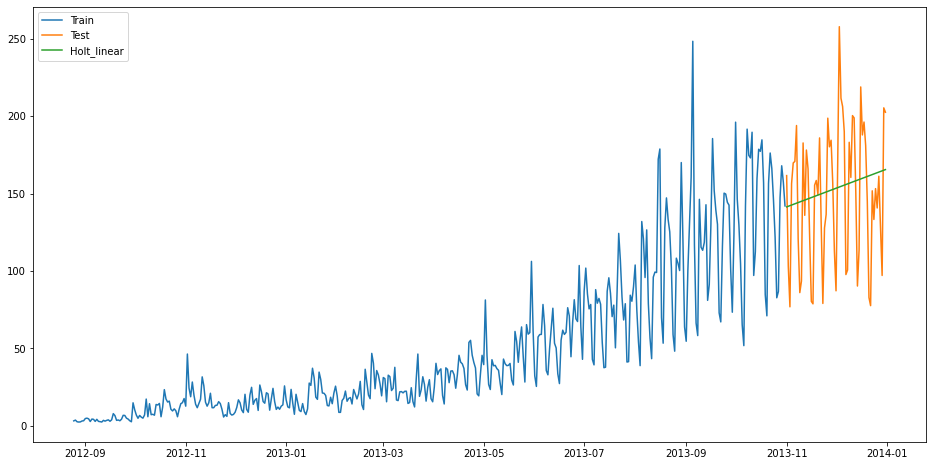

In [234]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [235]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

43.056259611507286


# Method 6 – Holt-Winters Method

### The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

### Using Holt’s winter method will be the best option among the rest of the models beacuse of the seasonality factor. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.

![Holts winters method formula](./holt-winter.webp)

### where s is the length of the seasonal cycle, for 0 ≤ α ≤ 1, 0 ≤ β ≤ 1 and 0 ≤ γ ≤ 1.

### The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t. The trend equation is identical to Holt’s linear method. The seasonal equation shows a weighted average between the current seasonal index, and the seasonal index of the same season last year (i.e., s time periods ago).

/Users/ertugrulsagdic/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


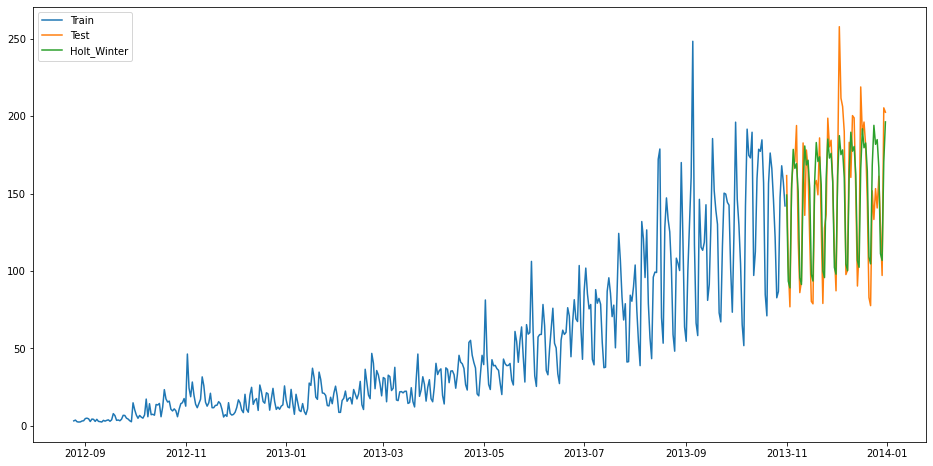

In [236]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [237]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

23.961492566159794


# Method 7 – ARIMA

### Another common Time series model that is very popular among the Data scientists is ARIMA. It stand for Autoregressive Integrated Moving average. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other. An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method.

In [238]:
import statsmodels.api as sm

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07269D+00    |proj g|=  4.57263D-02

At iterate    5    f=  4.04597D+00    |proj g|=  2.30548D-02

At iterate   10    f=  3.98051D+00    |proj g|=  2.91979D-02

At iterate   15    f=  3.97898D+00    |proj g|=  4.51611D-04

At iterate   20    f=  3.97893D+00    |proj g|=  1.09471D-02

At iterate   25    f=  3.97785D+00    |proj g|=  1.60441D-02

At iterate   30    f=  3.97542D+00    |proj g|=  3.33178D-02

At iterate   35    f=  3.97074D+00    |proj g|=  2.55974D-02

At iterate   40    f=  3.96847D+00    |proj g|=  7.42616D-03

At iterate   45    f=  3.96770D+00    |proj g|=  1.01914D-03

At iterate   50    f=  3.96769D+00    |proj g|=  8.64984D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/ertugrulsagdic/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


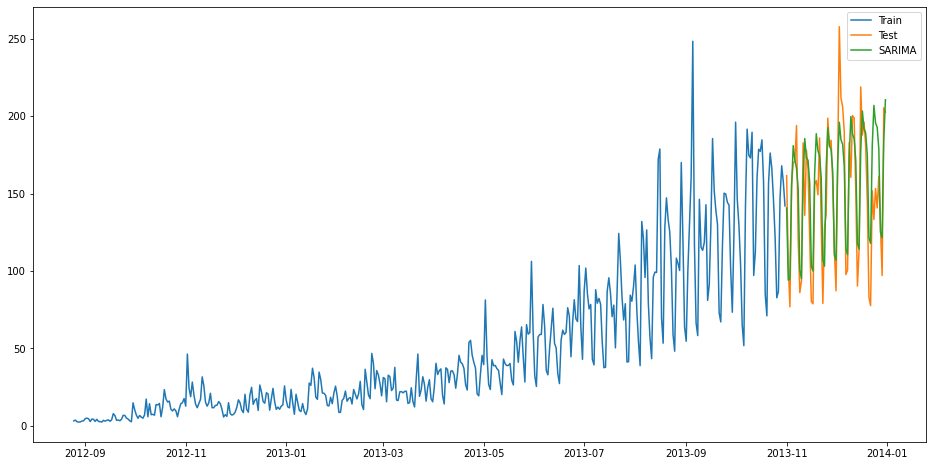

In [239]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()